In [1]:
excel_file_name = "20221219 - B701K Fan limitation.xlsx"

In [2]:
# All necessary library and package imports

# tabular data manipulation ; I see it as excel on steroids
import pandas as pd

# main plotting library
import matplotlib.pyplot as plt

# numerical calculations
import numpy as np

# machine learning library
from sklearn import datasets

# Principal component analysis
from sklearn.decomposition import PCA

# systems library to manipulate folders/files
import sys

# For the interactive display
from IPython.display import display, Markdown, clear_output

# For the widgets in the interactive display
from ipywidgets import (
    interactive,
    Select,
    Dropdown,
    IntSlider,
    FloatRangeSlider,
    Button,
    VBox,
    HBox,
    Box,
    Tab,
    ToggleButton,
    BoundedIntText,
    Output,
    SelectionRangeSlider,
    Label,
    Text,
)

# to have nice graphs with zoom function in the jupyter notebook
%matplotlib notebook

In [3]:
# for some reason needs to be run twice
%matplotlib notebook

In [4]:
# Add the scripts folder to the python PATH and import my scripts for plotting
sys.path.append("../scripts/")
sys.path.append(".")
from plotter import (
    scatter_plot_color,
    is_datetime,
    create_PCA_figure,
    add_intervals_parity_plot,
    f_save,
    create_widgets_interactive,
)
from reader import (
    read_pi_data_excel,
)

In [5]:
df = read_pi_data_excel(excel_file_name)
df.tail()

,"Pi-tag,Date,DD:MM:YY hh:mm:ss","TOA_SC705K.PV,B701K FAN SNELHEID ,rpm","TOA_FZ100K.PV,B701K TOTALE NAFTA VOED,T/h","TOA_FI110L.PV,B701L TOTAAL ETHAAN ,T/h","TOA_FI906K.PV,B701K FUEL GAS ,T/h","TOA_DI210.PV,FUELGAS SPEC. GRAV. ,kg/m³","TOA_FX601K.PV,B701K operating mode pass 1,","TOA_FX602K.PV,B701K operating mode pass 2,","TOA_FX603K.PV,B701K operating mode pass 3,","TOA_FX604K.PV,B701K operating mode pass 4,","TOA_FX605K.PV,B701K operating mode pass 5,","TOA_FX606K.PV,B701K operating mode pass 6,","TOA_FX607K.PV,B701K operating mode pass 7,","TOA_FX608K.PV,B701K operating mode pass 8,","TOA_QY206K.PV,B701K AVG SEVERITEIT,","NO TAG,Ethaan / Nafta ratio,/","NO TAG,Total B701K feed,/"
340,2022-12-15,99.915535,0.0,0.000000e+00,0.723279,0.569387,STOP,STOP,STOP,STOP,STOP,STOP,STOP,STOP,NaN,0.0,0.000000e+00
341,2022-12-16,99.915535,0.0,4.040985e-01,0.531907,0.570173,STOP,STOP,STOP,STOP,STOP,STOP,STOP,STOP,NaN,0.0,4.040985e-01
342,2022-12-17,99.915535,0.0,1.865508e-01,0.487106,0.560059,STOP,STOP,STOP,STOP,STOP,STOP,STOP,STOP,NaN,0.0,1.865508e-01
343,2022-12-18,99.915535,0.0,5.872826e-07,0.501260,0.557194,STOP,STOP,STOP,STOP,STOP,STOP,STOP,STOP,NaN,0.0,5.872826e-07
344,2022-12-19,99.915535,0.0,1.706597e-01,0.654514,0.556710,STOP,STOP,STOP,STOP,STOP,STOP,STOP,STOP,NaN,0.0,1.706597e-01


In [6]:
# just to check if all columns are floats or datetime and no strings are left inside
df.dtypes

Pi-tag,Date,DD:MM:YY hh:mm:ss                  datetime64[ns]
TOA_SC705K.PV,B701K FAN SNELHEID      ,rpm            float64
TOA_FZ100K.PV,B701K TOTALE NAFTA VOED,T/h             float64
TOA_FI110L.PV,B701L TOTAAL ETHAAN     ,T/h            float64
TOA_FI906K.PV,B701K FUEL GAS          ,T/h            float64
TOA_DI210.PV,FUELGAS SPEC. GRAV.     ,kg/m³           float64
TOA_FX601K.PV,B701K operating mode pass 1,             object
TOA_FX602K.PV,B701K operating mode pass 2,             object
TOA_FX603K.PV,B701K operating mode pass 3,             object
TOA_FX604K.PV,B701K operating mode pass 4,             object
TOA_FX605K.PV,B701K operating mode pass 5,             object
TOA_FX606K.PV,B701K operating mode pass 6,             object
TOA_FX607K.PV,B701K operating mode pass 7,             object
TOA_FX608K.PV,B701K operating mode pass 8,             object
TOA_QY206K.PV,B701K AVG SEVERITEIT,                   float64
NO TAG,Ethaan / Nafta ratio,/                         float64
NO TAG,T

In [7]:
(
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    plot_button,
    save_button,
    figure_name,
    grid_button,
    add_interval_button,
    marker_size_input,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
    tab,
) = create_widgets_interactive(df)

In [12]:
def update_plot(
    df,
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    grid_button,
    marker_size_input,
    add_interval_button,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
):
    global f
    df_copy = df.copy()
    
    for col in sliders:
        minn = sliders[col].value[0]
        maxx = sliders[col].value[1]
        filter_upper = df_copy[col] <= maxx
        filter_downer = df_copy[col] >= minn
        df_copy = df_copy[filter_upper]
        df_copy = df_copy[filter_downer]
        
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    add_intervals = add_interval_button.value 
    
    scatter_plot_color(
        f,
        ax,
        df_copy,
        xas,
        yas,
        coloring,
        markersize,
    )
    
    if df[xas].dtype == "float": 
        ax.set(
            xlim=(xlim_min_widget.value, xlim_max_widget.value),    
        )
    
    if df[yas].dtype == "float": 
        ax.set(
            ylim=(ylim_min_widget.value, ylim_max_widget.value),
        )
        
    if figure_title.value != "figure_title":
        ax.set(
            title=figure_title.value,
        )
    
    if add_intervals:
        add_intervals_parity_plot(ax)
    
    ax.grid(grid)

    f.tight_layout()
    
    return f

<IPython.core.display.Javascript object>


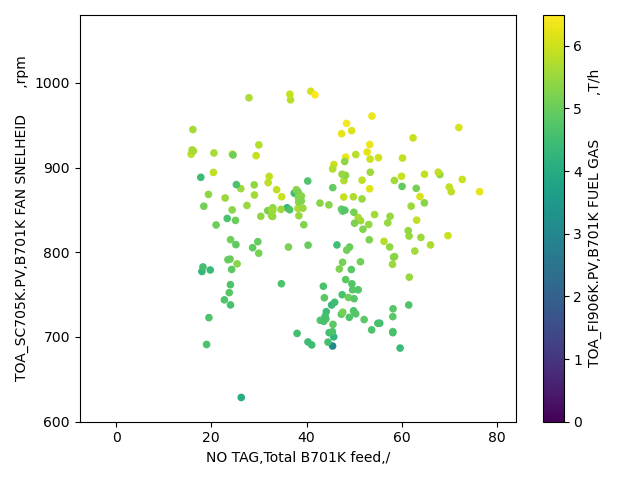

NO TAG,Total B701K feed,/
False


In [13]:
taskbar = VBox(children=[
    tab,
    HBox(children=[plot_button, figure_title,]),
    HBox(children=[save_button, figure_name]),
])

@plot_button.on_click
def plot_on_click(b):
    clear_output()
    display(taskbar)
    update_plot(  
        df,
        sliders,
        xas_widget,
        yas_widget,
        color_widget,
        grid_button,
        marker_size_input,
        add_interval_button,
        figure_title,
        xlim_min_widget,
        xlim_max_widget,
        ylim_min_widget,
        ylim_max_widget,
    )
    
@save_button.on_click
def save_fig(b):
    global f
    f_name = figure_name.value
    f_save(f, f_name)
    
display(taskbar)